In [2]:
# KMeans algoritmo não supervisionado
#importar as bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
warn.filterwarnings('ignore')

%matplotlib inline

In [13]:
#obteve os dados
escola_df = pd.read_csv('College_Data', index_col=0)

In [14]:
escola_df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [16]:
escola_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [18]:
escola_df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

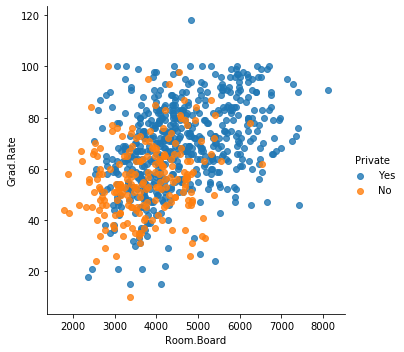

In [21]:
sns.lmplot('Room.Board', 'Grad.Rate', data=escola_df, hue='Private', fit_reg=False)

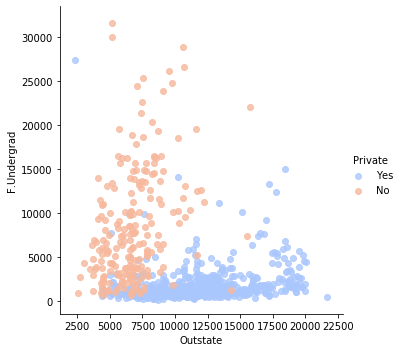

In [23]:
sns.lmplot('Outstate', 'F.Undergrad', data=escola_df, hue='Private', fit_reg=False, palette='coolwarm')

In [32]:
escola_df[escola_df['Grad.Rate']>100]

Empty DataFrame
Columns: [Private, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

In [34]:
escola_df['Grad.Rate']['Cazenovia College'] = 100

In [36]:
#Vamos usar o K-Means

In [38]:
#importar biblioteca do K-Means
from sklearn.cluster import KMeans

In [151]:
# ao usar o K-Means precisa informar a quantidade de clusters 
modelo_kmeans = KMeans(n_clusters=2)

In [41]:
#Precisamos normalizar os dados

In [124]:
# importar 
from sklearn.preprocessing import StandardScaler

In [45]:
# vamos criar os dados de entrada retirando toda a coluna 'Private'
X = escola_df.drop('Private', axis=1)

In [152]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [155]:
dados_normalizados = scaler.transform(X)

In [153]:
# dados normalizados
dados_normalizados

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -5.01910084e-01, -3.17992933e-01,  6.12553050e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
         1.66109850e-01, -5.51804628e-01,  6.12553050e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
        -1.77289956e-01, -6.68710475e-01,  6.12553050e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.56241250e-01, -9.60975094e-01,  6.12553050e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         5.88797079e+00,  1.96167109e+00,  6.12553050e-01],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
        -9.87115613e-01,  1.96167109e+00,  6.12553050e-01]])

In [156]:
X.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate',
       'Cluster'],
      dtype='object')

In [157]:
dados_escola_normalizados_df = pd.DataFrame(dados_normalizados, columns=X.columns)

In [143]:
dados_escola_normalizados_df

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0   -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1   -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2   -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3   -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4   -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   
5   -0.624307 -0.628611 -0.669812   0.592287   0.313426    -0.623421   
6   -0.684808 -0.685356 -0.729043  -0.598931  -0.545505    -0.677472   
7   -0.285088 -0.121984 -0.313353   0.535563   0.616579    -0.434450   
8   -0.507700 -0.481644 -0.595505   0.138490   0.363952    -0.562562   
9   -0.625600 -0.620854 -0.654735  -0.372032  -0.596031    -0.598459   
10  -0.328266 -0.242415 -0.331661   0.535563   0.970257    -0.385763   
11  -0.090399 -0.048501 -0.318738   0.932636   1.071307    -0.411138   
12  -0.471245 -0.505730 -0.527659   0.592287   0.414477    -0.530173   
13  -0.448492 -0.383258 -0.425352   0.932636   0.869206    -0.493864   
14  -0.648352 -0.696379 -0.670889  -0.258583  -0.494980    -0.491595   
15  -0.408934 -0.377951 -0.603044  -1.052728  -1.707589    -0.553279   
16   0.336210 -0.419183 -0.389814   3.144898   2.031290    -0.434656   
17  -0.461678 -0.453475 -0.384430  -0.485482  -0.798132    -0.388032   
18  -0.483914 -0.536756 -0.493198  -0.769105  -1.657064    -0.436100   
19   0.139194 -0.007268  0.254181  -0.201858  -0.090777     0.101106   
20  -0.591730 -0.554311 -0.568582  -0.145133  -0.596031    -0.616407   
21   1.114706  1.079876  1.216943  -0.428757   0.363952     1.287334   
22  -0.616033 -0.613506 -0.604120  -0.428757  -0.242353    -0.505211   
23   2.535702  3.383986  3.210314  -0.201858  -0.343404     3.897654   
24  -0.593022 -0.687805 -0.661197   1.046085   0.919731    -0.653953   
25  -0.327749 -0.118310  0.184182  -0.882554  -0.191827    -0.020198   
26  -0.224070 -0.130149 -0.311199  -0.258583   0.161850    -0.410931   
27   1.175466  1.948204  2.466165  -0.145133   0.060800     2.591566   
28  -0.604916 -0.614730 -0.563198  -0.882554  -1.303386    -0.335425   
29  -0.290259 -0.147295 -0.304738   0.478838   0.667104    -0.361007   
..        ...       ...       ...        ...        ...          ...   
747  0.025431  0.053559  0.048490  -1.393077  -1.808640    -0.096117   
748 -0.604916 -0.598401 -0.641812  -0.428757  -0.646556    -0.626103   
749 -0.518560 -0.470621 -0.433968   0.081765   0.111325    -0.472203   
750 -0.538985 -0.530225 -0.610582  -0.372032   0.212376    -0.561325   
751 -0.530453 -0.533082 -0.461968   0.819186   0.818680    -0.500053   
752 -0.405831 -0.448577 -0.249815   1.613332   1.424985    -0.309432   
753 -0.326715 -0.263644 -0.390891  -0.372032  -0.040251    -0.487882   
754 -0.542605 -0.515936 -0.610582  -0.712380  -0.343404    -0.562975   
755 -0.294913 -0.416734 -0.453352   0.989360   1.071307    -0.511606   
756 -0.341452 -0.387749 -0.469506   0.422113   0.363952    -0.508512   
757 -0.486241 -0.446127 -0.439352   0.875911   0.717630    -0.501291   
758 -0.223036 -0.215063 -0.299353  -0.201858   0.414477    -0.312320   
759 -0.354380 -0.239966 -0.372584  -0.712380  -1.000234    -0.391333   
760 -0.347399 -0.282423 -0.414583   1.216259   1.222884    -0.434243   
761 -0.604657 -0.600850 -0.500737   0.251939   0.566053    -0.499434   
762 -0.654816 -0.646573 -0.595505  -0.598931  -0.848657    -0.587731   
763  0.306218 -0.315898 -0.273507   3.031449   2.031290    -0.353167   
764 -0.732898 -0.771087 -0.790427  -0.655656  -0.292878    -0.722239   
765 -0.455732 -0.408977 -0.427506  -0.996004  -1.101284    -0.514288   
766  0.083605  0.011511  0.561102  -0.428757  -0.545505     0.433250   
767 -0.176238 -0.087284 -0.011817  -0.201858   0.262901    -0.062903   
768 -0.736777 -0.771903 -0.759196  -0.598931  -0.747607    -0.705116   
769 -0.264404 -0.114227 -0.220739   0.819186   0.616579    -0.354818   
770 -0.387991 -0.442453 -0.545967   1.329708   1.

In [158]:
modelo_kmeans.fit(dados_escola_normalizados_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [159]:
modelo_kmeans.cluster_centers_

array([[ 1.04483741,  1.1393409 ,  1.29652154, -0.18421044, -0.03491801,
         1.36954032,  1.00742316, -0.79832245, -0.40284591,  0.10779281,
         0.62143575,  0.38852228,  0.37552637,  0.81645673, -0.68723141,
        -0.33403106, -0.52582555, -1.49531327],
       [-0.31502635, -0.34351987, -0.39091102,  0.05554083,  0.01052804,
        -0.41292673, -0.30374568,  0.24070024,  0.12146108, -0.03250034,
        -0.18736756, -0.1171424 , -0.11322403, -0.24616786,  0.20720545,
         0.10071288,  0.15854037,  0.45084822]])

In [161]:
escola_df['Cluster']=modelo_kmeans.labels_

In [ ]:
centroids = modelo_kmeans.cluster_centers_
colors = 10*["g","r","c","b","k"]
    
for color, feature in zip(clf.labels_, data.values):
    plt.scatter(feature[0], feature[1], color=colors[color], s=35)

for c in range(len(clf.cluster_centers_)):
    plt.scatter(centroids[c][0], centroids[c][1],
    marker="o", color="k", s=50, linewidths=5)
    
labels = data.columns
plt.xlabel(labels[0])
plt.ylabel(labels[1])
plt.show()

In [150]:
escola_df

Private   Apps  Accept  Enroll  \
Abilene Christian University                Yes   1660    1232     721   
Adelphi University                          Yes   2186    1924     512   
Adrian College                              Yes   1428    1097     336   
Agnes Scott College                         Yes    417     349     137   
Alaska Pacific University                   Yes    193     146      55   
Albertson College                           Yes    587     479     158   
Albertus Magnus College                     Yes    353     340     103   
Albion College                              Yes   1899    1720     489   
Albright College                            Yes   1038     839     227   
Alderson-Broaddus College                   Yes    582     498     172   
Alfred University                           Yes   1732    1425     472   
Allegheny College                           Yes   2652    1900     484   
Allentown Coll. of St. Francis de Sales     Yes   1179     780     290   
Alma College                                Yes   1267    1080     385   
Alverno College                             Yes    494     313     157   
American International College              Yes   1420    1093     220   
Amherst College                             Yes   4302     992     418   
Anderson University                         Yes   1216     908     423   
Andrews University                          Yes   1130     704     322   
Angelo State University                      No   3540    2001    1016   
Antioch University                          Yes    713     661     252   
Appalachian State University                 No   7313    4664    1910   
Aquinas College                             Yes    619     516     219   
Arizona State University Main campus         No  12809   10308    3761   
Arkansas College (Lyon College)             Yes    708     334     166   
Arkansas Tech University                     No   1734    1729     951   
Assumption College                          Yes   2135    1700     491   
Auburn University-Main Campus                No   7548    6791    3070   
Augsburg College                            Yes    662     513     257   
Augustana College IL                        Yes   1879    1658     497   
...                                         ...    ...     ...     ...   
Westfield State College                      No   3100    2150     825   
Westminster College MO                      Yes    662     553     184   
Westminster College                         Yes    996     866     377   
Westminster College of Salt Lake City       Yes    917     720     213   
Westmont College                             No    950     713     351   
Wheaton College IL                          Yes   1432     920     548   
Westminster College PA                      Yes   1738    1373     417   
Wheeling Jesuit College                     Yes    903     755     213   
Whitman College                             Yes   1861     998     359   
Whittier College                            Yes   1681    1069     344   
Whitworth College                           Yes   1121     926     372   
Widener University                          Yes   2139    1492     502   
Wilkes University                           Yes   1631    1431     434   
Willamette University                       Yes   1658    1327     395   
William Jewell College                      Yes    663     547     315   
William Woods University                    Yes    469     435     227   
Williams College                            Yes   4186    1245     526   
Wilson College                              Yes    167     130      46   
Wingate College                             Yes   1239    1017     383   
Winona State University                      No   3325    2047    1301   
Winthrop University                          No   2320    1805     769   
Wisconsin Lutheran College                  Yes    152     128      75   
Wittenberg University                       

In [146]:
modelo_kmeans.labels_
# O que é 0 e o que é 1
# O 0 e universidade público ou privada 
# Abilene Christian University 	Yes 	1660 	1232 	721 	23 	52 	2885 	537 	7440 	3300 	450 	2200 	70 	78 	18.1 	12 	7041 	60

array([3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 0, 1, 0,
       3, 2, 1, 0, 1, 2, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 0, 1, 3, 3, 3,
       1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 2, 1, 2, 3, 1, 1, 3,
       3, 3, 3, 2, 1, 1, 1, 3, 1, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 1, 1,
       3, 3, 3, 1, 0, 3, 1, 3, 1, 3, 3, 3, 3, 3, 0, 0, 0, 3, 1, 3, 1, 3,
       3, 3, 0, 3, 1, 1, 3, 1, 2, 0, 3, 3, 1, 1, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 0, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3,
       3, 3, 3, 3, 1, 1, 3, 0, 1, 1, 1, 0, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1,
       2, 0, 3, 3, 0, 0, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 0, 1, 3, 0, 1, 0,
       3, 3, 1, 2, 3, 2, 3, 1, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 1,
       3, 1, 2, 0, 3, 1, 3, 1, 3, 3, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3, 1, 3,
       1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 1, 2, 1, 3, 3, 0, 2, 0, 3, 2, 1, 2, 3, 0, 3, 1, 1, 0,
       3, 1, 2, 3, 0, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3,

In [73]:
def conversor(valor):
    if valor == 'Yes':
        return 1
    else:
        return 0

In [75]:
escola_df['Cluster'] = escola_df['Private'].apply(conversor)

In [100]:
escola_df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  \
Abilene Christian University       18.1           12    7041         60   
Adelphi University                 12.2           16   10527         56   
Adrian College                     12.9           30    8735         54   
Agnes Scott College                 7.7           37   19016         59   
Alaska Pacific University          11.9            2   10922         15   

                              Cluster  
Abilene Christian University        1  
Adelphi University                  1  
Adrian College                      1  
Agnes Scott College                 1  
Alaska Pacific University           1

In [107]:
X['Cluster'] = escola_df['Private'].apply(conversor)
X.head()

Apps  Accept  Enroll  Top10perc  Top25perc  \
Abilene Christian University  1660    1232     721         23         52   
Adelphi University            2186    1924     512         16         29   
Adrian College                1428    1097     336         22         50   
Agnes Scott College            417     349     137         60         89   
Alaska Pacific University      193     146      55         16         44   

                              F.Undergrad  P.Undergrad  Outstate  Room.Board  \
Abilene Christian University         2885          537      7440        3300   
Adelphi University                   2683         1227     12280        6450   
Adrian College                       1036           99     11250        3750   
Agnes Scott College                   510           63     12960        5450   
Alaska Pacific University             249          869      7560        4120   

                              Books  Personal  PhD  Terminal  S.F.Ratio  \
Abilene Christian University    450      2200   70        78       18.1   
Adelphi University              750      1500   29        30       12.2   
Adrian College                  400      1165   53        66       12.9   
Agnes Scott College             450       875   92        97        7.7   
Alaska Pacific University       800      1500   76        72       11.9   

                              perc.alumni  Expend  Grad.Rate  Cluster  
Abilene Christian University           12    7041         60        1  
Adelphi University                     16   10527         56        1  
Adrian College                         30    8735         54        1  
Agnes Scott College                    37   19016         59        1  
Alaska Pacific University               2   10922         15        1

In [110]:
modelo_kmeans.cluster_centers_

array([[-0.32661962, -0.30530339, -0.25143507, -0.49913749, -0.50267293,
        -0.22105053, -0.03848678, -0.45792911, -0.37283453, -0.12172587,
         0.04875211, -0.49062908, -0.47906195,  0.23583839, -0.30713916,
        -0.42464126, -0.36177249],
       [ 0.54548844,  0.50988814,  0.41992248,  0.83361106,  0.83951561,
         0.36917718,  0.06427689,  0.76478882,  0.6226721 ,  0.20329475,
        -0.08142105,  0.81940114,  0.80008284, -0.39387442,  0.51295406,
         0.70919469,  0.60419735]])

In [122]:
modelo_kmeans.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [ ]:
modelo_kmeans.predict()

# Esta parte é apenas para efeitos didáticos

In [120]:

# Parte de métricas do modelo
# lembrando que o não supervisionado não tem target
# apenas como exercícos iremos comparar o resultado do que foi clusterizado e está em modelo_kmeans.labels_ com 
# a coluna 'Private'. Sendo que esta coluna ela retorna 'Yes' 'No'. Para comparar então os resultados da predição
# transformamos os dados da coluna 'Private' em 1 quando for 'Yes' e 0 quando for 'No'
# A transformação está na linha de comando escola_df['Cluster'] = escola_df['Private'].apply(conversor)
# A transformação de 1 e 0 foi colocada em uma nova coluna chamada 'Cluster' dentro do dataframe escola_df
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(escola_df['Cluster'],modelo_kmeans.labels_))

# Isso não ocorre na prática porque não 
print(classification_report(escola_df['Cluster'],modelo_kmeans.labels_))

[[146  66]
 [340 225]]
              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



# Possível forma de analisar
Uma possível análise
Tendo os dados das escolas e sem saber os targets e após mandar treinar o kmeans com dois clusters
ele agrupou 212 em 0 e 565 em 1

Após essa primeira análise iremos aplicar novos valores de K nestes dados e tentaremos após isso analisar como podemos enquadrar cada um dos agrupamentos feitos pelo K-Means.

Vamos passar estes resultados de agrupamentos para outra equipe para entender os cluster e fazer uma curadoria.